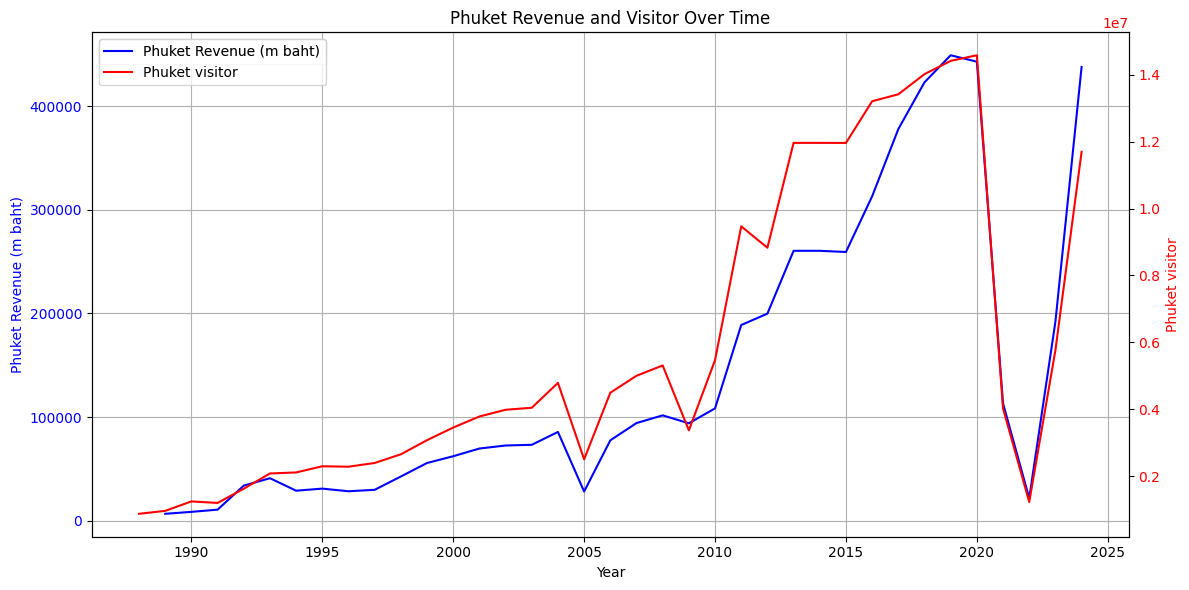

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# โหลดข้อมูลจากไฟล์ CSV
dataset = pd.read_csv('/content/data - data.csv')
# ทำความสะอาดคอลัมน์ 'Phuket Revenue (m baht)'
dataset['Phuket Revenue (m baht)'] = dataset['Phuket Revenue (m baht)'].astype(str).str.replace(',', '', regex=False)
dataset['Phuket Revenue (m baht)'] = pd.to_numeric(dataset['Phuket Revenue (m baht)'], errors='coerce')

# ทำความสะอาดคอลัมน์ 'Phuket visitor' หากมีค่าที่ไม่ใช่ตัวเลข
dataset['Phuket visitor'] = dataset['Phuket visitor'].astype(str).str.replace(',', '', regex=False)
dataset['Phuket visitor'] = pd.to_numeric(dataset['Phuket visitor'], errors='coerce')

fig, ax1 = plt.subplots(figsize=(12, 6))

# พล็อตรายได้บนแกน Y ซ้าย
sns.lineplot(data=dataset, x='Year', y='Phuket Revenue (m baht)', ax=ax1, color='blue', label='Phuket Revenue (m baht)')
ax1.set_title('Phuket Revenue and Visitor Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Phuket Revenue (m baht)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# สร้างแกน Y ขวาสำหรับจำนวนนักท่องเที่ยว
ax2 = ax1.twinx()
sns.lineplot(data=dataset, x='Year', y='Phuket visitor', ax=ax2, color='red', label='Phuket visitor')
ax2.set_ylabel('Phuket visitor', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# รวม legend จากทั้งสองแกน
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()